<a href="https://colab.research.google.com/github/ReyFrank92/joyofcoding/blob/main/Flujo_de_como_modelar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Install TensorFlow
!pip install -q tensorflow==2.0.0
import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 86.3 MB 35 kB/s 
     |████████████████████████████████| 50 kB 5.8 MB/s 
     |████████████████████████████████| 449 kB 52.8 MB/s 
     |████████████████████████████████| 3.8 MB 48.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.16.0 requires gast>=0.3.2, but you have gast 0.2.2 which is incompatible.
2.0.0


In [4]:
# Load in the data
from sklearn.datasets import load_breast_cancer

In [5]:
#load the data
data = load_breast_cancer()

In [6]:
#check the type of 'data'
type(data)

sklearn.utils.Bunch

In [7]:
#note it is a Bunch object
#this basically actas like a dictionary where you can treat the keys like attributes
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
# ' data' (the attribute) means the input data
data.data.shape
# it has 569 samples, 30 features

(569, 30)

In [9]:
# 'targets'
data.target
# note how the targets are just 0s and 1s
#normally, when you have K targets, they are labeld 0..K-1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [10]:
#their meaning is not lost
data.target_names


array(['malignant', 'benign'], dtype='<U9')

In [11]:
# there are also 569 corresponding targets
data.target.shape

(569,)

In [12]:
# you can also determine the meaning of each features
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [13]:
#normally we dould put all of our imports at the top
# but this lets us tell a story
from sklearn.model_selection import train_test_split

#split the data into train and test sets
#this lets us simulate how our model will perform in the future
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [14]:
#Scale the data
#you'll learn why scaling is needed in a later course
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

In [15]:
#Now all the fun Tensorflow stuff
#Build the model

model = tf.keras.models.Sequential([
 tf.keras.layers.Input(shape=(D,)),
 tf.keras.layers.Dense(1, activation='sigmoid')                                   
])

In [16]:
#Alternatively, you can do:
#model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Dende(1,input_shape=(D,), activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [17]:
#Train the model
r = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100)

#Evaluate the model - evaluate () returns loss and accuracy
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

Train on 381 samples, validate on 188 samples
Epoch 1/100
381/381 [==============================] - 1s 2ms/sample - loss: 0.3671 - accuracy: 0.8451 - val_loss: 0.4204 - val_accuracy: 0.8298
Epoch 2/100
381/381 [==============================] - 0s 127us/sample - loss: 0.3389 - accuracy: 0.8740 - val_loss: 0.3965 - val_accuracy: 0.8564
Epoch 3/100
381/381 [==============================] - 0s 114us/sample - loss: 0.3146 - accuracy: 0.8898 - val_loss: 0.3745 - val_accuracy: 0.8511
Epoch 4/100
381/381 [==============================] - 0s 126us/sample - loss: 0.2931 - accuracy: 0.9029 - val_loss: 0.3540 - val_accuracy: 0.8564
Epoch 5/100
381/381 [==============================] - 0s 134us/sample - loss: 0.2740 - accuracy: 0.9160 - val_loss: 0.3362 - val_accuracy: 0.8617
Epoch 6/100
381/381 [==============================] - 0s 117us/sample - loss: 0.2588 - accuracy: 0.9265 - val_loss: 0.3185 - val_accuracy: 0.8670
Epoch 7/100
381/381 [==============================] - 0s 109us/sample - l

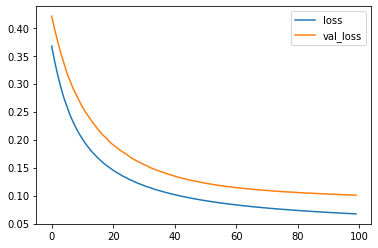

In [18]:
#Plot what's returnes by model.fit()
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

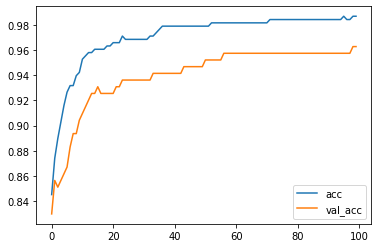

In [19]:
#Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

# Part 2: Making Predictions
this goes with the lecture "Making predicitons"

In [20]:
#make predictions
P = model.predict(X_test)
print(P) #the are outputs of the sigmoid, interpreted as probabilities p(y=1 /x)

[[8.40864182e-01]
 [9.98656869e-01]
 [9.99452472e-01]
 [8.75121593e-01]
 [2.39610672e-05]
 [2.14010477e-04]
 [1.17719173e-05]
 [9.97596741e-01]
 [1.15988135e-01]
 [9.99750495e-01]
 [3.80074978e-03]
 [9.88282084e-01]
 [5.96046448e-08]
 [2.50990391e-02]
 [9.95759666e-01]
 [7.28003860e-01]
 [1.01327896e-06]
 [9.95209217e-01]
 [9.96529818e-01]
 [9.95596766e-01]
 [9.67107296e-01]
 [9.99147177e-01]
 [3.83926332e-02]
 [9.93340254e-01]
 [9.99955595e-01]
 [9.92812514e-01]
 [9.19528484e-01]
 [9.25165951e-01]
 [6.38236344e-01]
 [2.26830035e-01]
 [1.31726265e-05]
 [9.99901533e-01]
 [2.98023224e-07]
 [9.99867558e-01]
 [2.89082527e-05]
 [9.97537851e-01]
 [9.40273166e-01]
 [5.40494919e-04]
 [8.94622207e-01]
 [9.21991944e-01]
 [9.99880433e-01]
 [4.99735713e-01]
 [9.98405576e-01]
 [9.95031059e-01]
 [9.48693037e-01]
 [9.99965310e-01]
 [9.73172903e-01]
 [9.74712133e-01]
 [9.57040668e-01]
 [9.98664916e-01]
 [9.91541624e-01]
 [1.59978867e-04]
 [9.99545932e-01]
 [2.38418579e-06]
 [3.97169799e-01]
 [9.103715

In [21]:
# Round to get the actual predictions
#Note: has to be flattened since the targets are size (N,) while the predicitons are size (N,1)
import numpy as np
P = np.round(P).flatten() #El flatten sirve para hacerlo en una sola dimension
print(P)

[1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0.]


In [22]:
#Calculate the accuracy, compare it to evaluate() output
print("Manually calculated accuracy:", np.mean(P == y_test))
print("Evaluate output:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.9627659574468085
188/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================